# Bayes Modelling for NLP
## Task 2: Spam Detection
### Spam Data Set: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
The objective is to train a model, which can be used for automatic detection of spam messages.<br>
We will use the experience showing that 
- messages, containing words like 'free', 'win', 'winner', 'cash', 'prize' and the like usually contain spam
- spam messages tend to have words written in all capitals and 
- also tend to use a lot of exclamation marks

### Step 1: Imports

In [7]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Dataset
We will be using a [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) from the UCI Machine Learning repository.

In [8]:

# It is a pre-processed table with two columns - a label and a message
# Import the table into a pandas dataframe using the read_table method
df = pd.read_csv('data/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
df.shape

(5572, 2)

In [9]:
# Printing out first five rows to get idea about the data
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 3: Data Preprocessing

#### Digitalize

In [10]:
# Convert the labels into numerical values, map 'ham' to 0 and 'spam' to 1
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head() 

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Bag-of-Words Processing

A model, which represents a piece of text, such as a sentence or a document, as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.
The words are stored as tockens, with a count of frequency of their appearance.

1. Convert strings to lower case
2. Remove punctuation
3. Tokenize the message and give an integer ID to each token
4. Count frequencies

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [12]:
# Create an instance of CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
training_data.shape

(4179, 7456)

In [13]:
# Transform testing data and return the matrix 
# Note we are not fitting the testing data into the CountVectorizer()
test_data = count_vector.transform(X_test)
test_data.shape

(1393, 7456)

### Step 4: Train Model

In [14]:
# Call Multinominal Naive Bayes and Train the model
model = MultinomialNB()
model.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Step 5: Test the Model

In [15]:
# Test on the test data, try prediction
y_predicted = model.predict(test_data)

In [16]:
y_predicted.shape

(1393,)

In [17]:
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Step 6: Validate the Accuracy

In [18]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test, y_predicted)))
print('Precision score: ', format(precision_score(y_test, y_predicted)))
print('Recall score: ', format(recall_score(y_test, y_predicted)))
print('F1 score: ', format(f1_score(y_test, y_predicted)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


In [19]:
# calculate confusion matrix to evaluate the the accuracy of the prediction
cmat = confusion_matrix(y_test, y_predicted)
cmat

array([[1203,    5],
       [  11,  174]], dtype=int64)

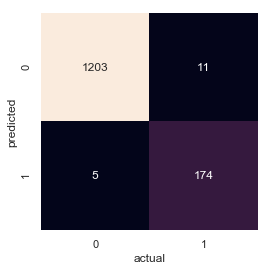

In [20]:
# visualize the confusion matrix by use of seaborn library
sns.set()
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

In [21]:
# print accuracy evaluation report
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.96       185

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



### Step 7: Implement the Model for New Data Prediction

In [22]:
my_predict = model.predict(test_data)

In [24]:
test_data.data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## <span style="color:red">Task</span>
Make a Google search for another Bayes method provided in sklearn.
Repeat the training, testing and validation.
Upload the answer to the question: Which method gives better results?
Apply the proves